### Libraries and Modules

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from PIL import Image

# Modules
from RICM_VESICLE import RICM
from FITTING import Fit_Gaussian

### Read the image and define the RICM model

In [2]:
# Read the image
img = io.imread("data/AVG_20161025_dsDNA_SC_36nm_Conc_6.00nM_WOC_Sample_D_03_RICMS_00-1.tif")

# Subtract the base line
img = img - 100

# Define the RICM class with certain n_inner
ricm = RICM(img, n_inner = 1.344)

### Display the way to the RICM height mapping step by step

Y0 = 0.01, A = 0.24, h0 = 32.11


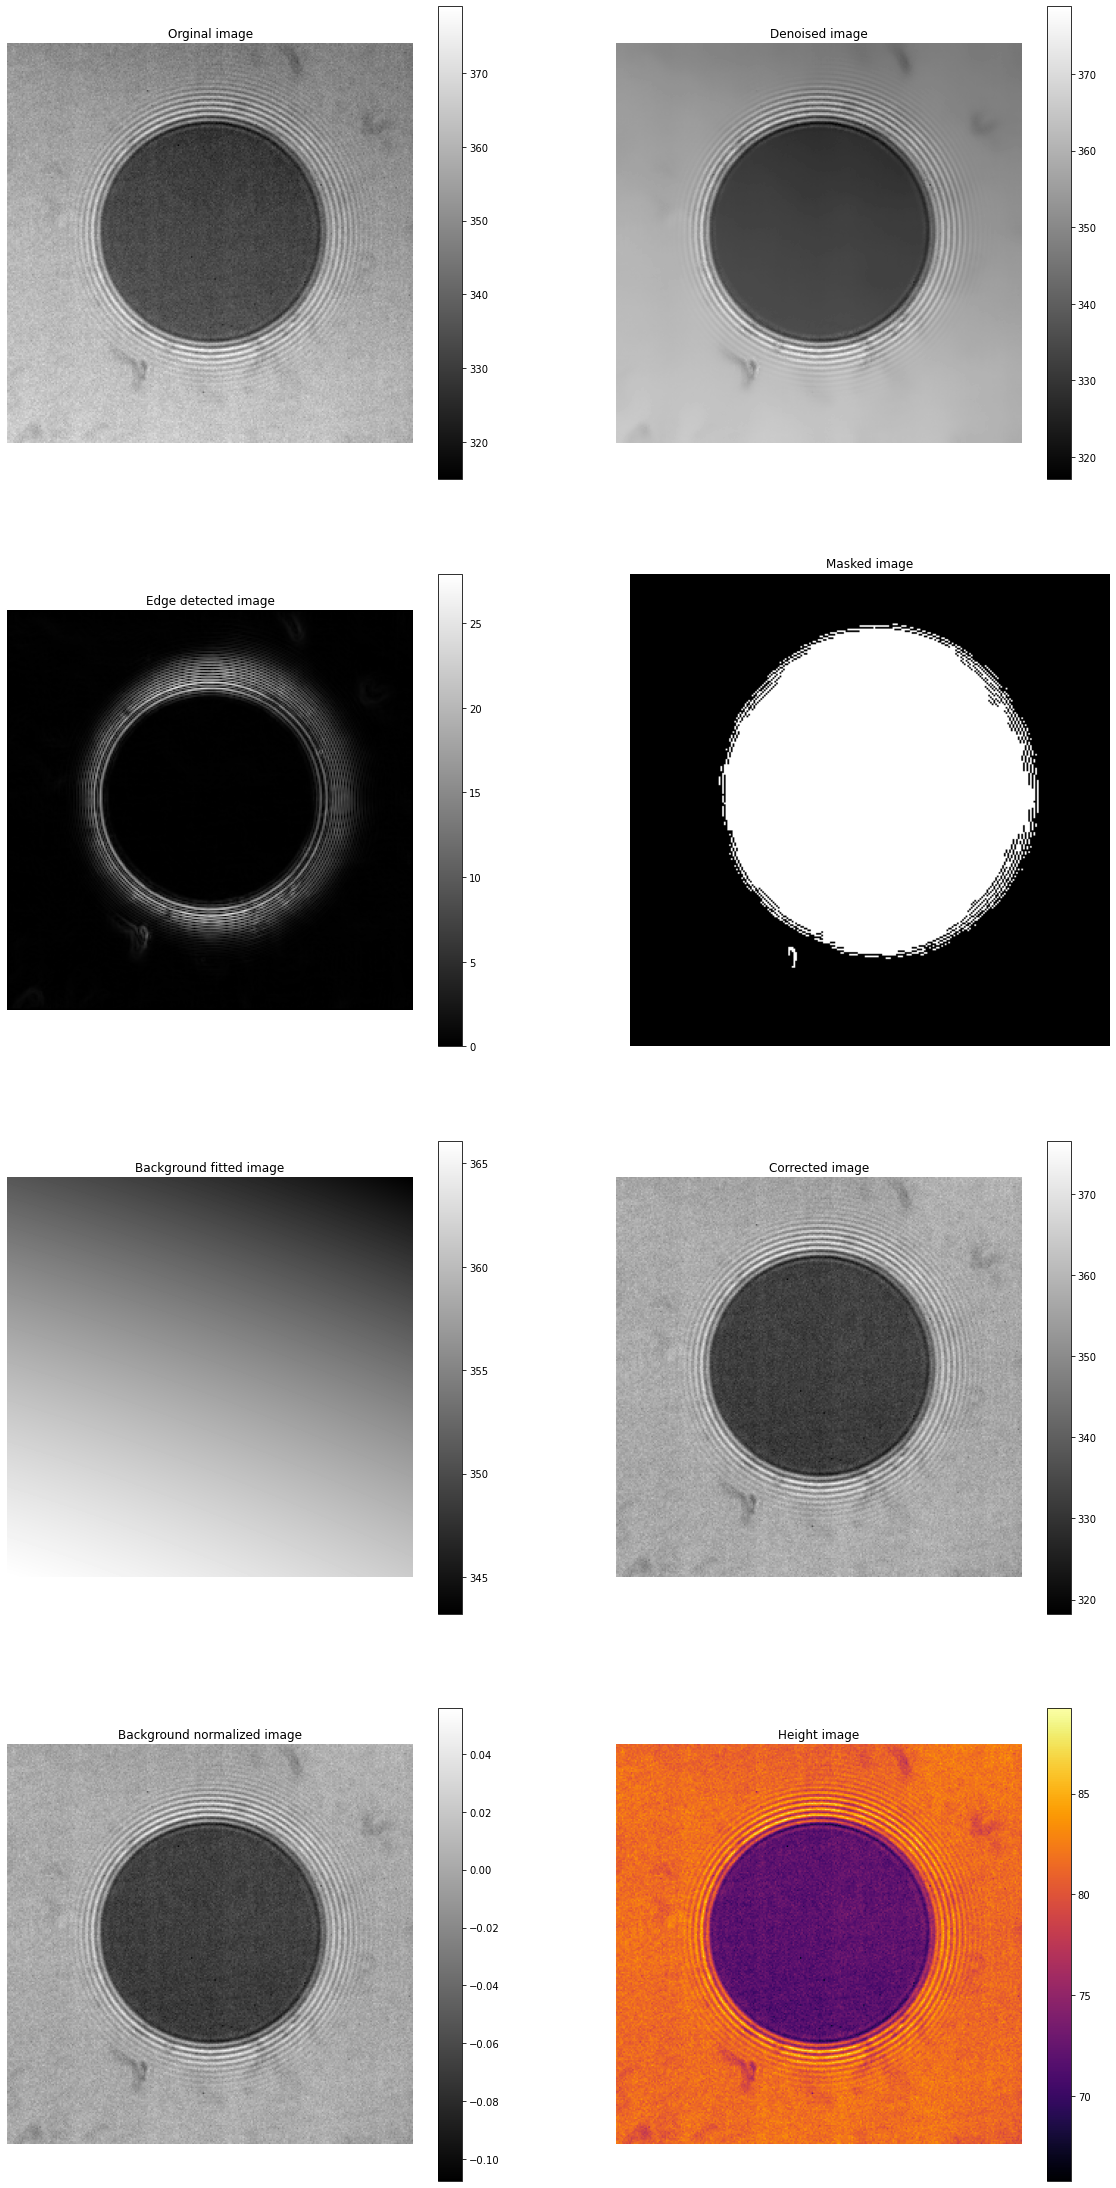

In [3]:
# display results
plt.figure(figsize=(20,40))

plt.subplot(421)
plt.axis('off')
plt.title('Orginal image')
plt.imshow(img, cmap = "gray")
plt.colorbar()

plt.subplot(422)
plt.axis('off')
plt.title('Denoised image')
plt.imshow(ricm.nl_denoise() , cmap = 'gray')
plt.colorbar()

plt.subplot(423)
plt.axis('off')
plt.title('Edge detected image')
plt.imshow(ricm.edge_detection() , cmap = 'gray')
plt.colorbar();

plt.subplot(424)
plt.axis('off')
plt.title('Masked image')
plt.imshow(ricm.mask() , cmap = 'gray')

plt.subplot(425)
plt.axis('off')
plt.title('Background fitted image')
plt.imshow(ricm.background_fitting() , cmap = 'gray')
plt.colorbar();

plt.subplot(426)
plt.axis('off')
plt.title('Corrected image')
plt.imshow(ricm.correct() , cmap = 'gray')
plt.colorbar()

plt.subplot(427)
plt.axis('off')
plt.title('Background normalized image')
plt.imshow(ricm.background_normalization() , cmap = 'gray')
plt.colorbar();

plt.subplot(428)
plt.axis('off')
plt.title('Height image')
plt.imshow(ricm.height() , cmap = 'inferno')
plt.colorbar();

# Save the image
#plt.savefig('Background subtracted image')

# Show the results
plt.show()

### Save the images in tif format

In [4]:
# Save the results
Image.fromarray(img).save('results/original.tif')
Image.fromarray(ricm.nl_denoise()).save('results/nl_denoise.tif')
Image.fromarray(ricm.edge_detection()).save('results/edge_detection.tif')
Image.fromarray(ricm.mask()).save('results/mask.tif')
Image.fromarray(ricm.background_fitting()).save('results/background_fitting.tif')
Image.fromarray(ricm.correct()).save('results/correct.tif')
Image.fromarray(ricm.background_normalization()).save('results/background_normalization.tif')
Image.fromarray(ricm.height()).save('results/height.tif')

Y0 = 0.01, A = 0.24, h0 = 32.11


### Show the argument of the arcosin to make sure it's between 1 and -1

Y0 = 0.01, A = 0.24, h0 = 32.11


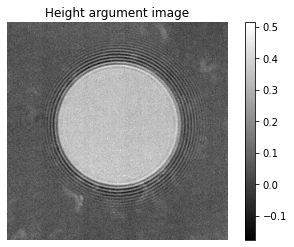

In [5]:
plt.axis('off')
plt.title('Height argument image')
plt.imshow(ricm.height_argument() , cmap = 'gray')
plt.colorbar();

### Display the height image and it's histogram

Y0 = 0.01, A = 0.24, h0 = 32.11


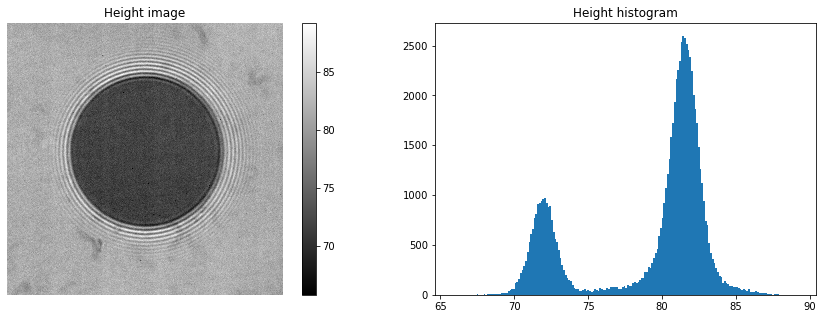

In [6]:
# Transform the image into int16 which is integer (-32768 to 32767)
img = ricm.height()

# display the image and it's histogram
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.axis('off')
plt.title('Height image')
plt.imshow(img, cmap = "gray")
plt.colorbar();

plt.subplot(122)
plt.title('Height histogram')
plt.hist(img.ravel(), bins = 200);
#plt.xlim(70,87)

### Cut the peak of the adhesion zone

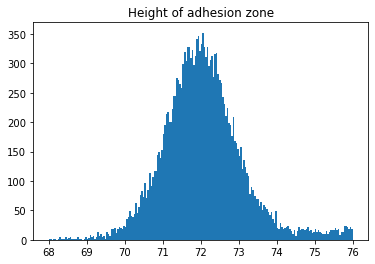

In [7]:
# Cut the peak of the adhesion zone
adhesion = []
for i in img.ravel():
    if i > 68 and i < 76:
        adhesion.append(i)
        
# Desplay the adhesion zone histogram
plt.title('Height of adhesion zone')
plt.hist(adhesion, bins = 200);

### Fit a gaussian to determin the height

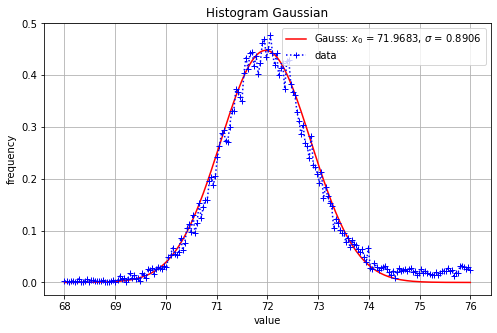

In [8]:
# Fit a gaussian on the adhesion zone histogram
gauss = Fit_Gaussian(adhesion, normalized= True)
height, _ = gauss.hist_fitting(show = True)

### The height of the GUV in nano meter

In [9]:
print('The height of the GUV is {:.2f} nm'.format(height))

The height of the GUV is 71.97 nm
